## Цепь Маркова
— последовательность случайных событий, в которой вероятность наступления каждого события зависит от состояния, достигнутого в предыдущем событии.
https://www.youtube.com/watch?v=FROlGrwo-oo&ab_channel=KhanAcademyRussian

In [1]:
from numpy import save
import numpy as np

def rabiner(sequence, matrixces, pi, states):
    for i in range(len(matrixces)):
        matrix = matrixces[i]
        alpha = [pi]
        for state in sequence[1:]:
            alpha_vec = [0]*len(states)
            for j in range(len(states)):
                # условие для того, чтобы понять, определено состояние или нет (скрин с z)
                if state:
                    alpha_vec[states.index(state)] += alpha[-1][j] * matrix[j][states.index(state)]
                else:
                    for s in states:
                        alpha_vec[states.index(s)] += alpha[-1][j] * matrix[j][states.index(s)]
            alpha.append(alpha_vec)
        print(np.array(alpha))
        save(f'alpha{i}.npy', alpha)
        result = sum(alpha[-1])
         # P - вероятность того, что данная последовательность сгенерирована на основе seq
        print('P = ', result)
        print('\n')
        

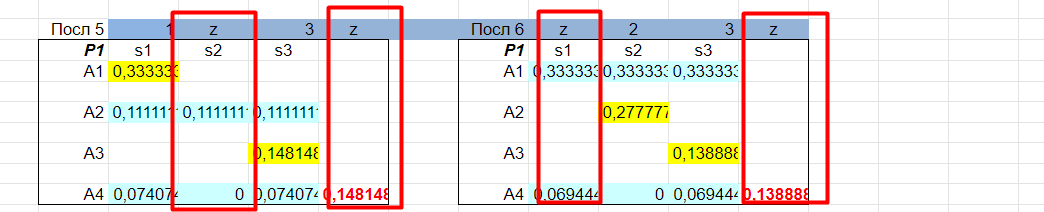

                                                        данные
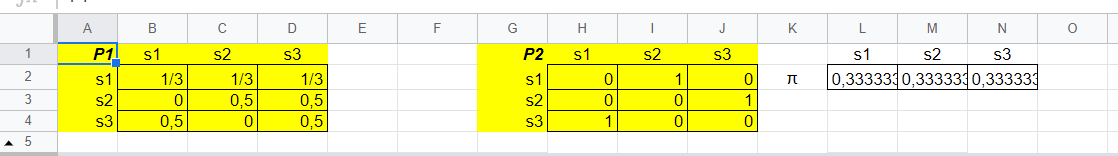

In [4]:
P1 = [[1/3, 1/3, 1/3], 
      [0, 0.5, 0.5], 
      [0.5, 0, 0.5]]

P2 = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]

pi = [1/3, 1/3, 1/3]

states = ['s1', 's2', 's3']

seq1 = ['s1', 's3', 's2', 's1']
seq2 = ['s1', 's2', 's3', 's1']
seq3 = ['s1', 's3', 's1', 's3']

seq4 = ['s1', 's3', 's3', 's1']
seq5 = ['s1', None, 's3', None]
seq6 = [None, 's2', 's3', None]

seq7 = [None, 's2', 's2', 's1']
seq8 = [None, None, 's2', 's1']


In [2]:
m1 = [[0.1, 0.5, 0.4], 
      [0.3, 0.3, 0.4], 
      [0.8, 0.1, 0.1]]

m2 = [[0.1, 0.5, 0.4],
     [0.3, 0.3, 0.4],
     [0.8, 0, 0.2]]

m3 = [[0.5, 0, 0.5],
     [0.05, 0.05, 0.9],
     [0.05, 0.9, 0.05]]

m4 = [[1/3, 1/3, 1/3],
     [1/3, 1/3, 1/3],
     [1/3, 1/3, 1/3]]

#начальный вектор, состоит из вероятностей начальных состояний
pi = [1, 0, 0]

#множество состояний
states = ['s1', 's2', 's3']
#множество допустимых реализаций цепи Маркова (последовательность наблюдений)
sequence = ['s1', 's1', 's3', 's2', 's3', 's1']

rabiner(sequence, [m1, m2, m3, m4], pi, states)

[[1.      0.      0.     ]
 [0.1     0.      0.     ]
 [0.      0.      0.04   ]
 [0.      0.004   0.     ]
 [0.      0.      0.0016 ]
 [0.00128 0.      0.     ]]
P =  0.0012800000000000005


[[1.   0.   0.  ]
 [0.1  0.   0.  ]
 [0.   0.   0.04]
 [0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]
P =  0.0


[[1.       0.       0.      ]
 [0.5      0.       0.      ]
 [0.       0.       0.25    ]
 [0.       0.225    0.      ]
 [0.       0.       0.2025  ]
 [0.010125 0.       0.      ]]
P =  0.010125000000000002


[[1.         0.         0.        ]
 [0.33333333 0.         0.        ]
 [0.         0.         0.11111111]
 [0.         0.03703704 0.        ]
 [0.         0.         0.01234568]
 [0.00411523 0.         0.        ]]
P =  0.004115226337448559




In [3]:
from numpy import load
data = load(f'alpha{0}.npy')
print(data)

[[1.      0.      0.     ]
 [0.1     0.      0.     ]
 [0.      0.      0.04   ]
 [0.      0.004   0.     ]
 [0.      0.      0.0016 ]
 [0.00128 0.      0.     ]]


In [5]:
pi = [1/3, 0, 0]
rabiner(seq1, [P1, P2], pi, states)

[[0.33333333 0.         0.        ]
 [0.         0.         0.11111111]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
P =  0.0


[[0.33333333 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
P =  0.0




In [6]:
pi = [1/3, 0, 0]
rabiner(seq2, [P1, P2], pi, states)

[[0.33333333 0.         0.        ]
 [0.         0.11111111 0.        ]
 [0.         0.         0.05555556]
 [0.02777778 0.         0.        ]]
P =  0.027777777777777776


[[0.33333333 0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.33333333]
 [0.33333333 0.         0.        ]]
P =  0.3333333333333333




In [7]:
pi = [1/3, 0, 0]
rabiner(seq3, [P1, P2], pi, states)

[[0.33333333 0.         0.        ]
 [0.         0.         0.11111111]
 [0.05555556 0.         0.        ]
 [0.         0.         0.01851852]]
P =  0.018518518518518517


[[0.33333333 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
P =  0.0




In [8]:
pi = [1/3, 0, 0]
rabiner(seq4, [P1, P2], pi, states)

[[0.33333333 0.         0.        ]
 [0.         0.         0.11111111]
 [0.         0.         0.05555556]
 [0.02777778 0.         0.        ]]
P =  0.027777777777777776


[[0.33333333 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
P =  0.0




In [9]:
pi = [1/3, 0, 0]
rabiner(seq5, [P1, P2], pi, states)

[[0.33333333 0.         0.        ]
 [0.11111111 0.11111111 0.11111111]
 [0.         0.         0.14814815]
 [0.07407407 0.         0.07407407]]
P =  0.14814814814814814


[[0.33333333 0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.33333333]
 [0.33333333 0.         0.        ]]
P =  0.3333333333333333




In [10]:
pi = [1/3, 1/3, 1/3]
rabiner(seq6, [P1, P2], pi, states)

[[0.33333333 0.33333333 0.33333333]
 [0.         0.27777778 0.        ]
 [0.         0.         0.13888889]
 [0.06944444 0.         0.06944444]]
P =  0.1388888888888889


[[0.33333333 0.33333333 0.33333333]
 [0.         0.33333333 0.        ]
 [0.         0.         0.33333333]
 [0.33333333 0.         0.        ]]
P =  0.3333333333333333




In [11]:
pi = [1/3, 1/3, 1/3]
rabiner(seq7, [P1, P2], pi, states)

[[0.33333333 0.33333333 0.33333333]
 [0.         0.27777778 0.        ]
 [0.         0.13888889 0.        ]
 [0.         0.         0.        ]]
P =  0.0


[[0.33333333 0.33333333 0.33333333]
 [0.         0.33333333 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
P =  0.0




In [12]:
pi = [1/3, 1/3, 1/3]
rabiner(seq8, [P1, P2], pi, states)

[[0.33333333 0.33333333 0.33333333]
 [0.27777778 0.27777778 0.44444444]
 [0.         0.23148148 0.        ]
 [0.         0.         0.        ]]
P =  0.0


[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.33333333 0.        ]
 [0.         0.         0.        ]]
P =  0.0


